In [1]:
import os
os.environ["PYARROW_IGNORE_TIMEZONE"]="1"
import findspark
findspark.init()
import pandas as pd
import numpy as np
import pyspark.pandas as ps
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
import cufflinks as cf
cf.go_offline()
from ydata_profiling import ProfileReport
import warnings
warnings.simplefilter("ignore", category=FutureWarning)

In [2]:
partOne = pd.read_json('./datasets/partOne.json')
partOne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641555 entries, 0 to 641554
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   year    641555 non-null  int64  
 1   sex     641555 non-null  object 
 2   name    641555 non-null  object 
 3   n       641555 non-null  int64  
 4   prop    641555 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 24.5+ MB


In [3]:
partTwo = pd.read_csv('./datasets/partTwo.csv')
partTwo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641555 entries, 0 to 641554
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   year    641555 non-null  int64  
 1   sex     641555 non-null  object 
 2   name    641555 non-null  object 
 3   n       641555 non-null  int64  
 4   prop    641555 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 24.5+ MB


In [4]:
db = sqlite3.connect("./datasets/partThree.sqlite")
partThree = pd.read_sql('SELECT * FROM parte3 WHERE tipo_dado = "1"', db)
partThree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641555 entries, 0 to 641554
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   year       641555 non-null  int64  
 1   sex        641555 non-null  object 
 2   name       641555 non-null  object 
 3   n          641555 non-null  int64  
 4   prop       641555 non-null  float64
 5   tipo_dado  641555 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 29.4+ MB


In [5]:
partThree.drop('tipo_dado', axis=1, inplace=True)
partThree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641555 entries, 0 to 641554
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   year    641555 non-null  int64  
 1   sex     641555 non-null  object 
 2   name    641555 non-null  object 
 3   n       641555 non-null  int64  
 4   prop    641555 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 24.5+ MB


In [6]:
babiesDF = pd.concat([partOne, partTwo, partThree])
babiesDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1924665 entries, 0 to 641554
Data columns (total 5 columns):
 #   Column  Dtype  
---  ------  -----  
 0   year    int64  
 1   sex     object 
 2   name    object 
 3   n       int64  
 4   prop    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 88.1+ MB


In [7]:
babiesDF.rename(columns={'year': 'YearOfBirth', 'sex': 'Gender', 'name':'Name',
                         'n': 'Count', 'prop': 'Prop'}, inplace=True)
babiesDF.to_csv('./datasets/babiesData.csv', index=False)

#### Exploração de dados

In [8]:
babiesData = pd.read_csv('./datasets/babiesData.csv', sep=',', encoding='utf8')
babiesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1924665 entries, 0 to 1924664
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   YearOfBirth  int64  
 1   Gender       object 
 2   Name         object 
 3   Count        int64  
 4   Prop         float64
dtypes: float64(1), int64(2), object(2)
memory usage: 73.4+ MB


In [9]:
babiesData

,YearOfBirth,Gender,Name,Count,Prop
0,1880,F,Mary,7065,0.072400
1,1880,F,Sarah,1288,0.013200
2,1880,F,Clara,1226,0.012600
3,1880,F,Ella,1156,0.011800
4,1880,F,Florence,1063,0.010900
...,...,...,...,...,...
1924660,2017,M,Zevon,5,0.000003
1924661,2017,M,Zikora,5,0.000003
1924662,2017,M,Zubeyr,5,0.000003
1924663,2017,M,Zyheem,5,0.000003


In [10]:
babiesData.isnull().sum()

YearOfBirth    0
Gender         0
Name           0
Count          0
Prop           0
dtype: int64

In [11]:
babiesData.describe()

,YearOfBirth,Count,Prop
count,1.924665e+06,1.924665e+06,1.924665e+06
mean,1.974851e+03,1.808733e+02,1.348896e-04
std,3.402948e+01,1.533337e+03,1.151881e-03
min,1.880000e+03,5.000000e+00,0.000000e+00
25%,1.951000e+03,7.000000e+00,3.180000e-06
50%,1.985000e+03,1.200000e+01,5.680000e-06
75%,2.003000e+03,3.200000e+01,1.717000e-05
max,2.017000e+03,9.968600e+04,8.154561e-02


In [12]:
babiesData.value_counts()

YearOfBirth  Gender  Name      Count  Prop    
1880         F       Abbie     71     0.000727    1
1998         F       Jassica   5      0.000003    1
                     Jatia     6      0.000003    1
                     Jaterria  5      0.000003    1
                     Jataya    13     0.000007    1
                                                 ..
1965         M       Camille   14     0.000007    1
                     Cameron   324    0.000200    1
                     Cam       21     0.000011    1
                     Calvin    2046   0.001080    1
2017         M       Zyrus     7      0.000004    1
Length: 1924665, dtype: int64

In [13]:
# babiesEDA = ProfileReport(babiesData, title='babiesEDA', explorative=True)
# babiesEDA.to_file(output_file='./datasets/babiesEDA.html')

#### 1- Quantos nomes diferentes existem por ano a partir de 2000? Forneça uma tabela e demonstre os resultados graficamente.

In [14]:
yearGenZ = babiesData[(babiesData['YearOfBirth'] >= 2000)]

In [15]:
yearGenZView = yearGenZ.groupby(['YearOfBirth', 'Name']).size()
yearGenZView

YearOfBirth  Name   
2000         Aadam      1
             Aadarsh    1
             Aadil      1
             Aaditya    1
             Aahil      1
                       ..
2017         Zyriah     1
             Zyrie      1
             Zyron      1
             Zyrus      1
             Zyva       1
Length: 547898, dtype: int64

In [16]:
GenZStatistics = pd.crosstab(index=yearGenZ['Name'], columns=yearGenZ['YearOfBirth'])
GenZStatistics

YearOfBirth,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Name,,,,,,,,,,,,,,,,,,
Aaban,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1
Aabha,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0
Aabid,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
Aabir,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
Aabriella,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zyvion,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Zyvon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
Zyyanna,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [17]:
GenZStatistics.sum()

YearOfBirth
2000    29769
2001    30269
2002    30563
2003    31183
2004    32046
2005    32546
2006    34082
2007    34950
2008    35070
2009    34702
2010    34067
2011    33903
2012    33732
2013    33269
2014    33228
2015    33098
2016    32979
2017    32469
dtype: int64

In [18]:
px.bar(GenZStatistics.sum(), title="Total of Different Names per Year (2000-2017)", color='value',
       labels={"YearOfBirth":"Year", "value": "Total Names"})

#### 2- Qual a média e a mediana da contagem de bebês no dataset.

In [19]:
BabyNames = babiesData.groupby("Name").sum()
BabyNames.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97310 entries, Aaban to Zzyzx
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YearOfBirth  97310 non-null  int64  
 1   Count        97310 non-null  int64  
 2   Prop         97310 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 3.0+ MB


In [20]:
del BabyNames['YearOfBirth']

In [21]:
BabyNames.sort_values("Count", ascending = False)

,Count,Prop
Name,,
James,5173828,4.656407
John,5137142,5.368042
Robert,4834915,3.866205
Michael,4372536,2.447280
Mary,4138360,4.547474
...,...,...
Maider,5,0.000003
Maide,5,0.000002
Maichail,5,0.000003


In [22]:
len(BabyNames)

97310

In [23]:
BabyNames.mean()

Count    3577.438259
Prop        0.002668
dtype: float64

In [24]:
BabyNames.median()

Count    46.000000
Prop      0.000025
dtype: float64

#### 2 - Qual dessas medidas de tendência central você escolheria para descrever esse dado, justifique sua opção.

##### Escolheria a média! Com ela consigo ter melhor compreenção dos dados do dataset como por exemplo a média de nomes por bebês de forma rápida e facil.

In [25]:
BabyNames.std()

Count    55265.248086
Prop         0.046923
dtype: float64

#### 3- Qual a média e desvio padrão da contagem de bebês no ano de 1997?

In [26]:
babiesDataXCVII = babiesData[(babiesData['YearOfBirth'] == 1997)]

In [27]:
babyNamesXCVII = babiesDataXCVII.groupby("Name").sum()
babyNamesXCVII.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24884 entries, Aadam to Zyria
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YearOfBirth  24884 non-null  int64  
 1   Count        24884 non-null  int64  
 2   Prop         24884 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 777.6+ KB


In [28]:
del babyNamesXCVII['YearOfBirth']

In [29]:
babyNamesXCVII.sort_values("Count", ascending = False)

,Count,Prop
Name,,
Michael,37690,0.018873
Jacob,34212,0.017132
Matthew,31561,0.015825
Christopher,29162,0.014631
Joshua,28344,0.014160
...,...,...
Deaunna,5,0.000003
Saban,5,0.000003
Deavonte,5,0.000003


In [30]:
len(babyNamesXCVII)

24884

#### Média da contagem de bebês por nomes

In [31]:
babyNamesXCVII.mean()

Count    145.667859
Prop       0.000073
dtype: float64

In [32]:
babyNamesXCVII.median()

Count    11.000000
Prop      0.000005
dtype: float64

#### Desvio padrão de contagem de bebês por nome

In [33]:
babyNamesXCVII.std()

Count    1083.400944
Prop        0.000551
dtype: float64

#### 4- Levando em conta que o dataset engloba o nascimento de todos os bebês do país imaginário Hilablândia. Qual o total de nascimentos no ano de 2002? Desses, quantos são do sexo feminino e quantos do sexo masculino?

In [34]:
babyNamesMMII = babiesData[(babiesData['YearOfBirth'] == 2002)]
babyNamesMMII

,YearOfBirth,Gender,Name,Count,Prop
464171,2002,F,Ashley,15342,0.007800
464172,2002,F,Sarah,14758,0.007500
464173,2002,F,Elizabeth,14600,0.007400
464174,2002,F,Isabella,12166,0.006200
464175,2002,F,Megan,9209,0.004700
...,...,...,...,...,...
1758020,2002,M,Zerick,5,0.000002
1758021,2002,M,Zerrick,5,0.000002
1758022,2002,M,Zevion,5,0.000002
1758023,2002,M,Zevon,5,0.000002


In [35]:
GenderStatisticsMMII = babyNamesMMII.pivot_table(columns="Gender", values="Count", aggfunc=np.sum)
GenderStatisticsMMII

Gender,F,M
Count,1795741,1940301


In [36]:
px.bar(GenderStatisticsMMII.T, title="Sex Ratio at Birth (Male Births per Female Births) - 2002", 
       color="value", labels={"value": "Total Babies"})

#### 5 (Opcional) - Use sua criatividade para explorar a base e tentar retirar algum insight como por exemplo variação dos nomes Luke e Leia de acordo com lançamento dos filmes da série Star Wars.

In [37]:
lukeDF = (babiesData
                .query('Name in "Luke" & YearOfBirth >= 1970 & YearOfBirth <= 2000')
               )

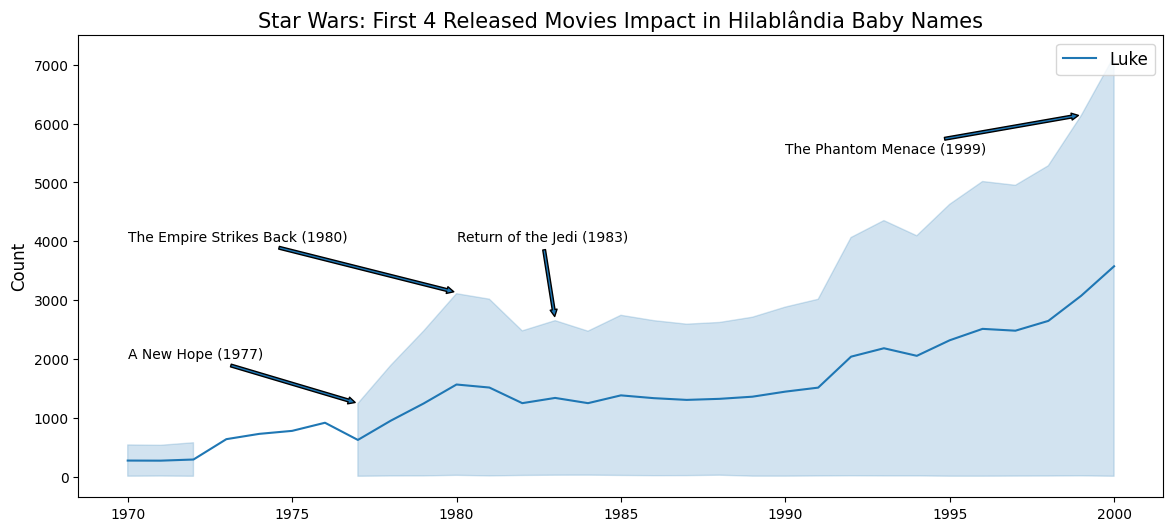

In [38]:
plt.figure(figsize = (14, 6))

sns.lineplot(data = lukeDF, x = "YearOfBirth", y = "Count", hue = "Name")

plt.annotate('A New Hope (1977)', xy = (1977, 1246), xycoords = 'data', 
            xytext = (1970, 2000), textcoords = 'data', arrowprops = dict(arrowstyle = 'simple'),
            fontsize = 10)

plt.annotate('The Empire Strikes Back (1980)', xy = (1980, 3130), xycoords = 'data', 
            xytext = (1970, 4000), textcoords = 'data', arrowprops = dict(arrowstyle = 'simple'),
            fontsize = 10)

plt.annotate('Return of the Jedi (1983)', xy = (1983, 2674), xycoords = 'data', 
            xytext = (1980, 4000), textcoords = 'data', arrowprops = dict(arrowstyle = 'simple'),
            fontsize = 10)

plt.annotate('The Phantom Menace (1999)', xy = (1999, 6148), xycoords = 'data', 
            xytext = (1990, 5500), textcoords = 'data', arrowprops = dict(arrowstyle = 'simple'),
            fontsize = 10)

plt.ylabel("Count", fontsize = 12)
plt.xlabel("")
plt.title("Star Wars: First 4 Released Movies Impact in Hilablândia Baby Names", fontsize = 15)
plt.legend(title = "", fontsize = 12)

In [39]:
leiaDF = (babiesData
                .query('Name in "Leia" & YearOfBirth >= 1970 & YearOfBirth <= 2000')
               )

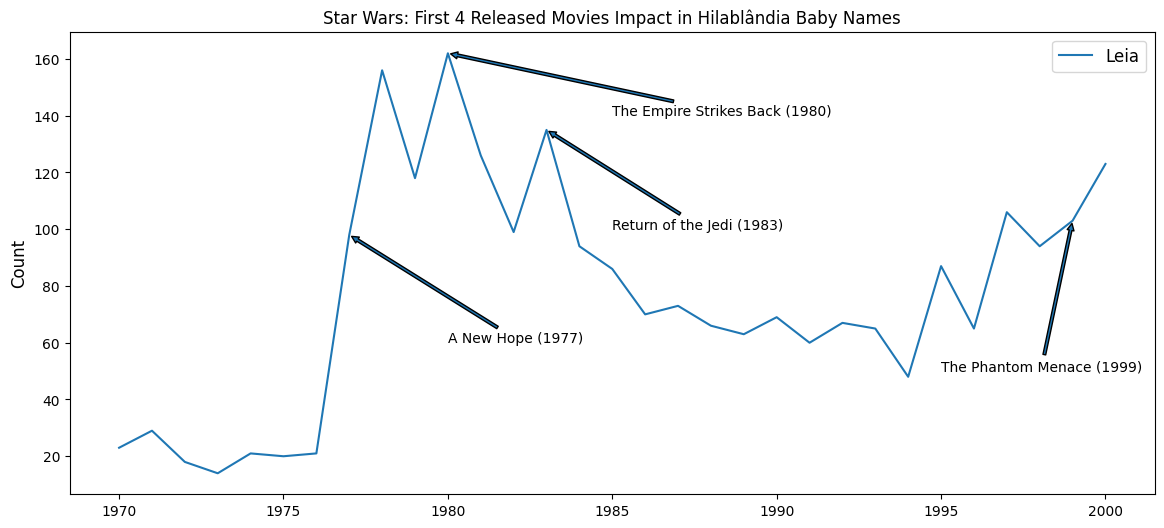

In [40]:
plt.figure(figsize = (14, 6))

sns.lineplot(data = leiaDF, x = "YearOfBirth", y = "Count", hue = "Name")

plt.annotate('A New Hope (1977)', xy = (1977, 98), xycoords = 'data', 
            xytext = (1980, 60), textcoords = 'data', arrowprops = dict(arrowstyle = 'simple'),
            fontsize = 10)

plt.annotate('The Empire Strikes Back (1980)', xy = (1980, 162), xycoords = 'data', 
            xytext = (1985, 140), textcoords = 'data', arrowprops = dict(arrowstyle = 'simple'),
            fontsize = 10)

plt.annotate('Return of the Jedi (1983)', xy = (1983, 135), xycoords = 'data', 
            xytext = (1985, 100), textcoords = 'data', arrowprops = dict(arrowstyle = 'simple'),
            fontsize = 10)

plt.annotate('The Phantom Menace (1999)', xy = (1999, 103), xycoords = 'data', 
            xytext = (1995, 50), textcoords = 'data', arrowprops = dict(arrowstyle = 'simple'),
            fontsize = 10)

plt.ylabel("Count", fontsize = 12)
plt.xlabel("")
plt.title("Star Wars: First 4 Released Movies Impact in Hilablândia Baby Names", fontsize = 12)
plt.legend(title = "", fontsize = 12)